### Import package

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import TopoSPAM
import numpy as np  
import matplotlib.pyplot as plt 
TopoSPAM.set_repo_path('/Users/krishna/PhD/TopoSPAM')

Success: The path '/Users/krishna/PhD/TopoSPAM' contains the TopoSPAM repository.


### Initialize mesh and parameters

In [3]:
%matplotlib inline
#initialize instance
Flat2Dome = TopoSPAM.SpringLatticeParameters()
#set parameters
Flat2Dome.mesh_geometry = "circle"
Flat2Dome.thickness = 0.08
#load mesh
Flat2Dome.load_mesh()

AttributeError: module 'os' has no attribute 'join'

### Load spontaneous strain pattern

In [3]:
#load spontaneous strain pattern
Flat2Dome.nematic_coordinates = "polar"
lambda_r = np.poly1d([0.25, 0.25, 1])
lambda_theta = np.poly1d([1])
lambda_h = np.poly1d([1])
Flat2Dome.load_strain_pattern(lambda1 = lambda_r, lambda2 = lambda_theta, lambda3 = lambda_h)

### Perform the simulation

In [4]:

#add noise
np.random.seed(0)
Flat2Dome.add_noise(0.01)
#performm simulation
Steps=Flat2Dome.RunSpringLatticeSimulation(tol = 5*1e-8)

Implementing external forces
$$$$$$$ Running openfpm $$$$$$$
mpic++ -O3 -c --std=c++11 -o main.o main.cpp -I -Wno-deprecated-declarations   -I.  -I/Users/krishna/softwares/OpenFPM//openfpm_numerics/include -I/Users/krishna/softwares/OpenFPM//openfpm_pdata/include/config -I/Users/krishna/softwares/OpenFPM//openfpm_pdata/include -I/Users/krishna/softwares/OpenFPM//openfpm_data/include -I/Users/krishna/softwares/OpenFPM//openfpm_vcluster/include -I/Users/krishna/softwares/OpenFPM//openfpm_io/include -I/Users/krishna/softwares/OpenFPM//openfpm_devices/include -I/Users/krishna/softwares/OpenFPM/dependencies//VCDEVEL/include  -I/Users/krishna/softwares/OpenFPM/dependencies//METIS/include -I/Users/krishna/softwares/OpenFPM/dependencies//PARMETIS/include -I/Users/krishna/softwares/OpenFPM/dependencies//BOOST/include -I/Users/krishna/softwares/OpenFPM/dependencies//HDF5/include -I/Users/krishna/softwares/OpenFPM/dependencies//LIBHILBERT/include  
mpic++ -o grid main.o  -L/Users/krishna/software

### Visualize the results

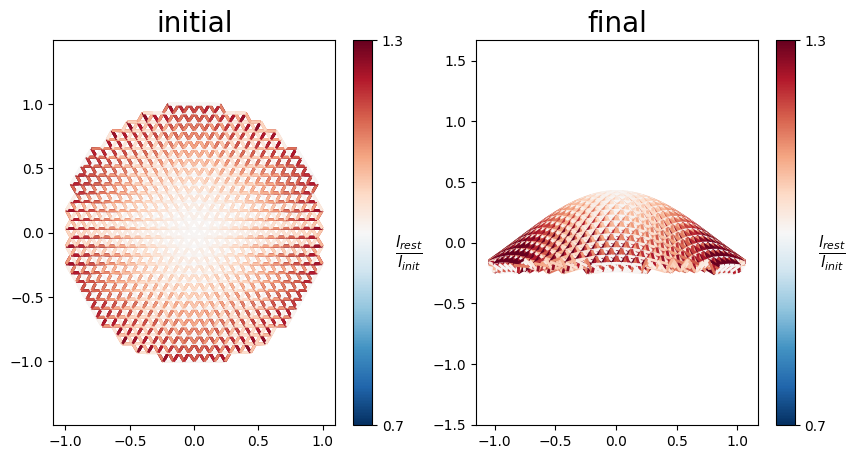

In [5]:
#visualize the pattern
%matplotlib inline
fig,axs = plt.subplots(1,2,figsize=(10,5))

fig,axs[0] = Flat2Dome.visualize(ax = axs[0], fig = fig, mode = "discrete", state = "initial", x = "x", y = "y", title = "initial")
fig,axs[1] = Flat2Dome.visualize(ax = axs[1], fig = fig, mode = "discrete", state = "final", x = "x", y = "z", title = "final")